In [1]:
using TSSM

 *** OPENMP n_threads =           4


In [2]:
push!(LOAD_PATH, pwd())
include("groundstate.jl")

groundstate! (generic function with 1 method)

In [3]:
V(x, y) = -2/sqrt(x^2+1)-2/sqrt(y^2+1)+1/sqrt((x-y)^2+1)

V (generic function with 1 method)

Potential shifted such that V_shifted>=0:

In [4]:
V_shifted(x, y) = V(x, y) + 3

V_shifted (generic function with 1 method)

Groundstate calculation can be done using only real numbers, we use the shifted potential and atomic units (hbar=1, mass=1):

In [5]:
m = SchroedingerReal2D(512, -15, 15, 512, -15, 15, potential=V_shifted, boundary_conditions=dirichlet, hbar=1, mass=1)

TSSM.SchroedingerReal2D{Float64}(Ptr{Void} @0x0000000002623550)

In [6]:
psi = wave_function(m)

TSSM.WfSchroedingerReal2D{Float64}(Ptr{Void} @0x00000000036d9a80,TSSM.SchroedingerReal2D{Float64}(Ptr{Void} @0x0000000002623550))

In [7]:
f(x,y)=exp(-x^2-y^2)
set!(psi, f)

In [8]:
groundstate!(psi, extrapolation_order=4, tol=1e-8, max_iters=1000, dt=1)

    0   1.408499308349472e+00   1.408499308349472e+00   1.000e+06   4.091e-01   2.918e+01      0.23   1.841112619059960e+00   1.000e+06   3.935e-01
changed step size, old:   1.000000000000000e+00  new:   5.000000000000000e-01
    1   1.408500400487399e+00   1.408500400487399e+00  -1.092e-06   4.091e-01   3.249e-01      0.39
    2   1.157509836740007e+00   1.157509836740007e+00   2.510e-01   3.735e-01   2.475e-01      0.48
    3   1.008848530011093e+00   1.008848530011093e+00   1.487e-01   3.410e-01   1.913e-01      0.56
    4   9.119114067305643e-01   9.119114067305643e-01   9.694e-02   3.063e-01   1.550e-01      0.64
    5   8.492116968325502e-01   8.492116968325502e-01   6.270e-02   2.606e-01   1.248e-01      0.72
    6   8.109395382020316e-01   8.109395382020316e-01   3.827e-02   2.099e-01   9.748e-02      0.80
    7   7.887919879254938e-01   7.887919879254938e-01   2.215e-02   1.623e-01   7.414e-02      0.87
    8   7.764241165213199e-01   7.764241165213199e-01   1.237e-02   1.224e

Consider unshifted potential:

In [9]:
set_potential!(m, V)

In [10]:
E = get_energy_expectation_deviation(psi)[1]

-2.2382578241083273

In [11]:
save(psi, "1dhelium_groundstate.hdf5")

In [12]:
using PyPlot

In [13]:
x,y=get_nodes(m);
u=get_data(psi,true)
to_real_space!(psi)

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in pointer_to_array(::Ptr{Float64}, ::Int32, ::Bool) at ./deprecated.jl:50
 in get_nodes(::TSSM.SchroedingerReal2D{Float64}) at /home/hofi/.julia/v0.5/TSSM/src/tssm_common.jl:268
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/hofi/.julia/v0.5/IJulia/src/execute_request.jl:169
 in eventloop(::ZMQ.Socket) at /home/hofi/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##9#15)() at ./task.jl:360
while loading In[13], in expression starting on line 1
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in pointer_to_array(::Ptr{Float64}, ::Int32, ::Bool) at ./deprecated.jl:50
 in get_nodes(::TSSM.SchroedingerReal2D{Float64}) at /home/hofi/.julia/v0.5/TSSM/src/tssm_common.jl:271
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/hofi/.julia/v0.5/IJulia/src/execute_request.jl:169
 in eventloop(::ZMQ.So

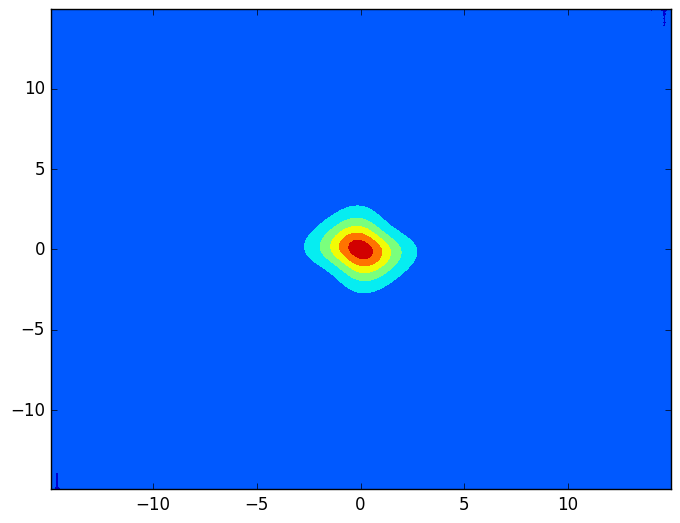

PyObject <matplotlib.contour.QuadContourSet object at 0x7f5fdf788910>

  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/hofi/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /home/hofi/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/hofi/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /home/hofi/.julia/v0.5

In [14]:
contourf(x,y,u)

In [4]:
m = Schroedinger2D(512, -15, 15, 512, -15, 15, potential=V, boundary_conditions=dirichlet, hbar=1, mass=1)

TSSM.Schroedinger2D{Float64}(Ptr{Void} @0x0000000003810e40)

In [5]:
psi = wave_function(m)

TSSM.WfSchroedinger2D{Float64}(Ptr{Void} @0x0000000003889dc0,TSSM.Schroedinger2D{Float64}(Ptr{Void} @0x0000000003810e40))

In [6]:
kick_duration = 0.01
kick_amplitude = 0.01

0.01

In [7]:
V_kick(x, y) = V(x, y) + 0.01*(x+y)

V_kick (generic function with 1 method)

In [8]:
include("time_stepper.jl")

local_orders (generic function with 5 methods)

In [17]:
load!(psi, "1dhelium_groundstate.hdf5")

In [18]:
E = potential_energy(psi)+kinetic_energy(psi)

-2.238257824108359

In [19]:
set_potential!(m, V_kick)

In [20]:
for t in equidistant_time_stepper(psi, 0, kick_duration, 0.01, Strang)
end

In [21]:
set_potential!(m, V)

In [22]:
E = potential_energy(psi)+kinetic_energy(psi)

-2.238257814107541

In [23]:
k = 0
out = zeros(20001)
for t in equidistant_time_stepper(psi, 0, 2000, 0.01, Strang)
    if mod(k,10)==0
        E_pot, E_int, x_mean, x_dev, y_mean, y_dev = get_realspace_observables(psi)
        out[div(k,10)+1] = x_mean
        println(t,"\t", x_mean)
    end    
    k += 1
end

0.01	-1.4999732652658798e-6
0.10999999999999999	-1.1486489211833458e-5
0.21000000000000005	-2.1411869871257316e-5
0.3100000000000001	-3.122410558922817e-5
0.4100000000000002	-4.0873109664163465e-5
0.5100000000000002	-5.0311317519119436e-5
0.6100000000000003	-5.949410191779477e-5
0.7100000000000004	-6.838004304717655e-5
0.8100000000000005	-7.693108945412697e-5
0.9100000000000006	-8.511263819181714e-5
1.0100000000000007	-9.28935553331095e-5
1.1100000000000008	-0.00010024615242691659
1.2100000000000009	-0.00010714613017445695
1.310000000000001	-0.0001135724977456426
1.410000000000001	-0.00011950747383247806
1.5100000000000011	-0.00012493637417496095
1.6100000000000012	-0.0001298474890127771
1.7100000000000013	-0.0001342319532128683
1.8100000000000014	-0.0001380836111950927
1.9100000000000015	-0.00014139887837863463
2.010000000000001	-0.00014417660048179903
2.109999999999999	-0.00014641791185453223
2.209999999999997	-0.00014812609380164543
2.3099999999999947	-0.0001493064336761183
2.409999

LoadError: LoadError: InterruptException:
while loading In[23], in expression starting on line 3

Blackman-Harris window:

In [38]:
function omega1(n) 
    M=8000
    (0.35875-0.4891775*cos(2*pi*n/(M-1))+0.1365995*cos(4*pi*n/(M-1))
    -0.0106411*cos(6pi*n/(M-1))+0.028*cos(2*pi*n/(M-1)))
end

omega1 (generic function with 1 method)

In [26]:
out[1:8000]

8000-element Array{Float64,1}:
 -1.49997e-6 
 -1.14865e-5 
 -2.14119e-5 
 -3.12241e-5 
 -4.08731e-5 
 -5.03113e-5 
 -5.94941e-5 
 -6.838e-5   
 -7.69311e-5 
 -8.51126e-5 
 -9.28936e-5 
 -0.000100246
 -0.000107146
  ⋮          
  9.91766e-5 
  9.65882e-5 
  9.37108e-5 
  9.0538e-5  
  8.70647e-5 
  8.32871e-5 
  7.9204e-5  
  7.48161e-5 
  7.0127e-5  
  6.51428e-5 
  5.98724e-5 
  5.43275e-5 

In [28]:
using PyPlot

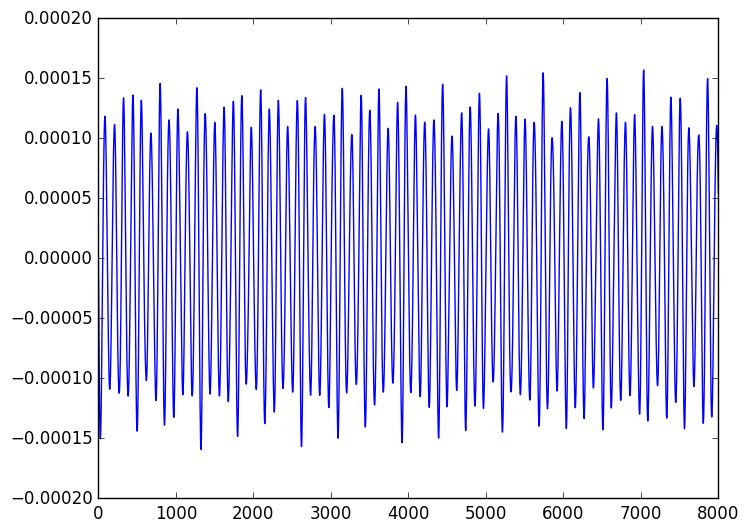

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc3a9556c10>

In [30]:
plot(out[1:8000])

In [39]:
om=[omega1(k) for k=1:8000]

8000-element Array{Float64,1}:
 0.0235309
 0.0235309
 0.0235309
 0.023531 
 0.023531 
 0.023531 
 0.0235311
 0.0235311
 0.0235312
 0.0235312
 0.0235313
 0.0235314
 0.0235315
 ⋮        
 0.0235312
 0.0235312
 0.0235311
 0.0235311
 0.023531 
 0.023531 
 0.023531 
 0.0235309
 0.0235309
 0.0235309
 0.0235309
 0.0235309

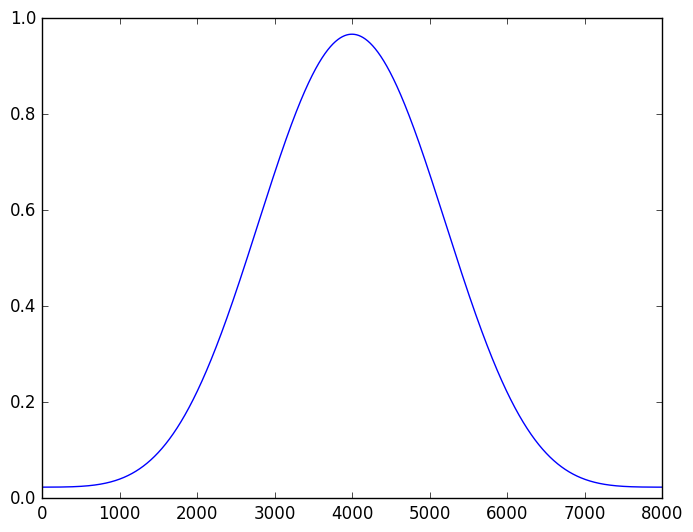

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc3a6c652d0>

In [40]:
plot(om)

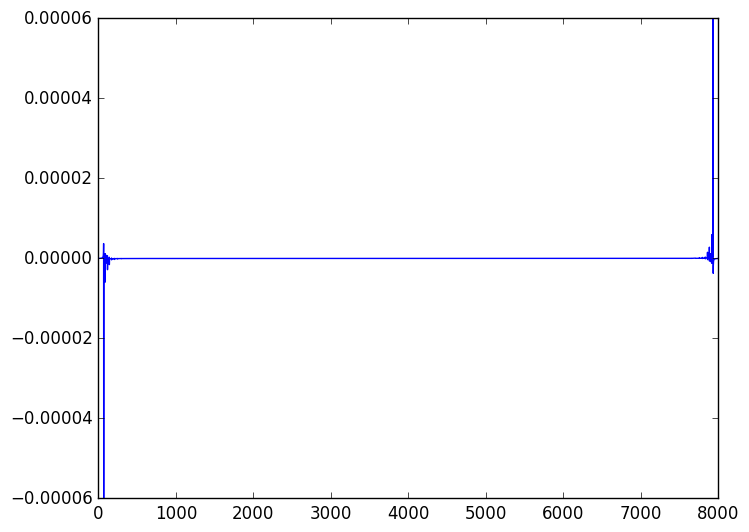

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc3a6749a90>

In [48]:
plot(imag(ifft(out[1:8000])))